<a href="https://colab.research.google.com/github/guptapallavi30/Datasets/blob/master/HD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install talos

In [2]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

%matplotlib inline

import sys
sys.path.insert(0, '/Users/mikko/Documents/GitHub/talos')
import talos

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
url = 'https://raw.githubusercontent.com/guptapallavi30/Datasets/master/processed.hungarian.csv'
#header=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach","exang", "oldpeak", "slope", "ca", "thal", "prediction"]
data = pd.read_csv(url, header = None) # header = None means no header in csv file
#data = pd.read_csv("./Datasets/processed.hungarian.csv") 
# Preview the first 5 lines of the loaded data 
#data.head()

In [4]:
import numpy as np
data = data.replace(to_replace = '?', value = np.nan)
#data.head()

In [5]:
print(data.shape)
#for pandas
data.isna().sum()

(294, 14)


0       0
1       0
2       0
3       1
4      23
5       8
6       1
7       1
8       1
9       0
10    190
11    291
12    266
13      0
dtype: int64

In [6]:
data.drop(data.columns[10:13], axis = 1, inplace = True)
data.drop(data.columns[4:6], axis = 1, inplace = True) # drop column 4 and 5
#data.isna().sum()
data.fillna(data.mean(axis = 1), inplace = True)
data.dropna(inplace = True)
data.isna().sum()

0     0
1     0
2     0
3     0
6     0
7     0
8     0
9     0
13    0
dtype: int64

In [7]:
#change all values in data to int
data = data.astype(int) 

In [8]:
# first we have to make sure to input data and params into the function
def breast_cancer_model(x_train, y_train, x_val, y_val, params):

    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'],
                  metrics=['acc', talos.utils.metrics.f1score])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        callbacks=[talos.utils.live()],
                        epochs=params['epochs'],
                        verbose=0)

    return history, model

In [9]:
#shuffle rows
data = data.sample(frac = 1)
print(data.shape)

# convert datafram to numpy
data = data.to_numpy()

# then we load the dataset
# separate x and y
print(type(data))
y = data[:, data.shape[1] - 1]
x = data[:, 0:(data.shape[1] - 1)]
print(type(y))
y=y.astype('int')
print(type(y))

# and normalize every feature to mean 0, std 1
x = talos.utils.rescale_meanzero(x)

(294, 9)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
x, y

(array([[-1.12989536,  0.61562019, -1.01852254, ..., -0.75389969,
         -0.54121653, -0.62238472],
        [ 0.1502173 ,  0.61562019,  0.0176215 , ...,  1.46579404,
         -0.54121653, -0.62238472],
        [ 0.02220604,  0.61562019,  1.05376554, ..., -1.15748036,
         -0.54121653, -0.62238472],
        ...,
        [-1.12989536,  0.61562019, -1.01852254, ...,  0.29541007,
         -0.54121653,  1.65067251],
        [ 0.9182849 ,  0.61562019, -1.01852254, ...,  0.45684235,
         -0.54121653, -0.62238472],
        [ 0.02220604,  0.61562019, -1.01852254, ..., -0.83461582,
         -0.54121653, -0.62238472]]),
 array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
   

In [11]:
# train test split
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=None)
X_train.shape, X_test.shape
print(type(Y_train))

<class 'numpy.ndarray'>


In [12]:
p = {'lr': (0.8, 1.2, 3),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (1, 5, 5),
     'epochs': [50, 100, 150],
     'dropout': (0, 0.2, 3),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'kernel_initializer': ['uniform','normal'],
     'optimizer': ['Adam', 'Nadam', 'RMSprop'],
     'losses': ['binary_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}

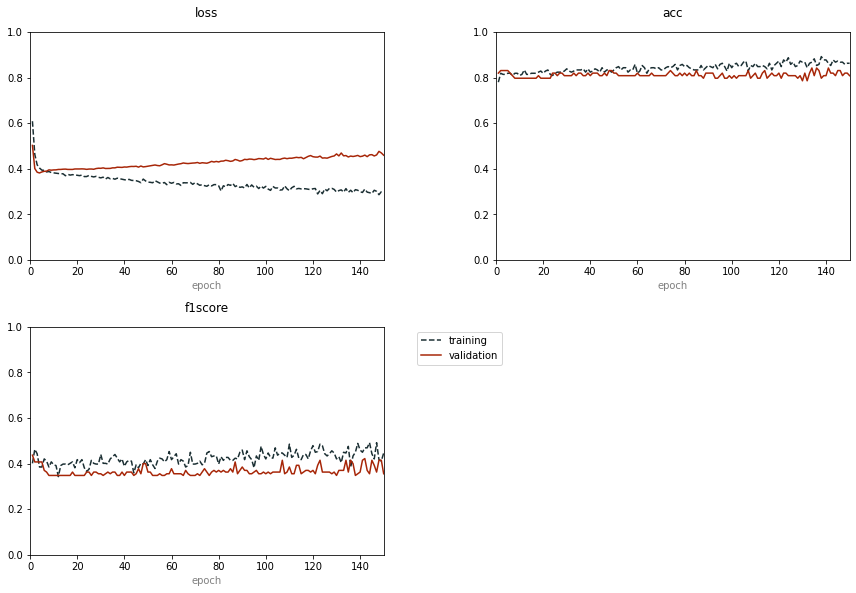

100%|██████████| 10/10 [12:57<00:00, 77.72s/it]


In [13]:
# and run the experiment
t = talos.Scan(X_train, Y_train,
               model=breast_cancer_model,
               params=p,
               experiment_name='HD_Test_1',
               x_val = X_test, 
               y_val = Y_test,
               round_limit=10)

In [14]:
t = pd.DataFrame(t.data)
#t.plot_corr()

In [15]:
t

,round_epochs,val_loss,val_acc,val_f1score,loss,acc,f1score,activation,batch_size,dropout,emb_output_dims,epochs,first_neuron,hidden_layers,kernel_initializer,last_activation,losses,lr,optimizer,shape,weight_regulizer
0,50,0.413335,0.808989,0.421111,0.346992,0.824390,0.464734,elu,3,0.133333,None,50,16,1,normal,sigmoid,binary_crossentropy,1.066667,Nadam,brick,None
1,150,0.441108,0.842697,0.414815,0.307365,0.863415,0.462783,elu,2,0.133333,None,150,8,1,uniform,sigmoid,binary_crossentropy,1.066667,Nadam,brick,None
2,100,0.414682,0.842697,0.303371,0.339959,0.858537,0.263415,relu,1,0.066667,None,100,4,1,normal,sigmoid,binary_crossentropy,0.800000,Nadam,brick,None
3,150,0.454283,0.797753,0.444444,0.311964,0.873171,0.601449,elu,3,0.066667,None,150,32,2,uniform,sigmoid,binary_crossentropy,0.800000,Adam,brick,None
4,100,0.526819,0.808989,0.280899,0.277764,0.873171,0.273171,elu,1,0.000000,None,100,16,0,normal,sigmoid,binary_crossentropy,1.066667,Nadam,brick,None
5,150,0.481251,0.831461,0.444444,0.270122,0.878049,0.504854,relu,2,0.133333,None,150,32,2,normal,sigmoid,binary_crossentropy,1.066667,Adam,long_funnel,None
6,150,0.427224,0.797753,0.340741,0.359012,0.814634,0.398058,elu,2,0.133333,None,150,64,2,uniform,sigmoid,binary_crossentropy,0.933333,RMSprop,long_funnel,None
7,50,0.409016,0.797753,0.448889,0.393465,0.819512,0.501449,elu,3,0.133333,None,50,64,1,uniform,sigmoid,binary_crossentropy,1.066667,RMSprop,long_funnel,None
8,150,0.440083,0.820225,0.280899,0.306680,0.873171,0.273171,elu,1,0.133333,None,150,8,1,uniform,sigmoid,binary_crossentropy,0.800000,Nadam,long_funnel,None
9,150,0.460024,0.808989,0.355556,0.298696,0.863415,0.446602,elu,2,0.066667,None,150,64,0,normal,sigmoid,binary_crossentropy,0.800000,Adam,long_funnel,None


<Figure size 1440x720 with 0 Axes>

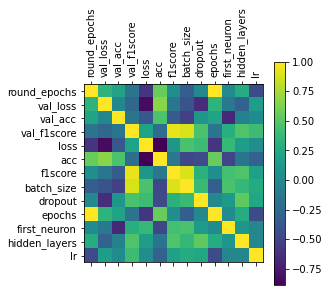

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20,10))

#make the scan into dataframe using t = pd.DataFrame(t.data)
#create matrix
plt.matshow(t.corr())
plt.xticks(range(t.corr().shape[1]), t.corr().columns, rotation=90)
plt.yticks(range(t.corr().shape[1]), t.corr().columns)
cb = plt.colorbar()
plt.show()


In [35]:
t

,round_epochs,val_loss,val_acc,val_f1score,loss,acc,f1score,activation,batch_size,dropout,emb_output_dims,epochs,first_neuron,hidden_layers,kernel_initializer,last_activation,losses,lr,optimizer,shape,weight_regulizer
0,50,0.413335,0.808989,0.421111,0.346992,0.824390,0.464734,elu,3,0.133333,None,50,16,1,normal,sigmoid,binary_crossentropy,1.066667,Nadam,brick,None
1,150,0.441108,0.842697,0.414815,0.307365,0.863415,0.462783,elu,2,0.133333,None,150,8,1,uniform,sigmoid,binary_crossentropy,1.066667,Nadam,brick,None
2,100,0.414682,0.842697,0.303371,0.339959,0.858537,0.263415,relu,1,0.066667,None,100,4,1,normal,sigmoid,binary_crossentropy,0.800000,Nadam,brick,None
3,150,0.454283,0.797753,0.444444,0.311964,0.873171,0.601449,elu,3,0.066667,None,150,32,2,uniform,sigmoid,binary_crossentropy,0.800000,Adam,brick,None
4,100,0.526819,0.808989,0.280899,0.277764,0.873171,0.273171,elu,1,0.000000,None,100,16,0,normal,sigmoid,binary_crossentropy,1.066667,Nadam,brick,None
5,150,0.481251,0.831461,0.444444,0.270122,0.878049,0.504854,relu,2,0.133333,None,150,32,2,normal,sigmoid,binary_crossentropy,1.066667,Adam,long_funnel,None
6,150,0.427224,0.797753,0.340741,0.359012,0.814634,0.398058,elu,2,0.133333,None,150,64,2,uniform,sigmoid,binary_crossentropy,0.933333,RMSprop,long_funnel,None
7,50,0.409016,0.797753,0.448889,0.393465,0.819512,0.501449,elu,3,0.133333,None,50,64,1,uniform,sigmoid,binary_crossentropy,1.066667,RMSprop,long_funnel,None
8,150,0.440083,0.820225,0.280899,0.306680,0.873171,0.273171,elu,1,0.133333,None,150,8,1,uniform,sigmoid,binary_crossentropy,0.800000,Nadam,long_funnel,None
9,150,0.460024,0.808989,0.355556,0.298696,0.863415,0.446602,elu,2,0.066667,None,150,64,0,normal,sigmoid,binary_crossentropy,0.800000,Adam,long_funnel,None


In [33]:
d = pd.DataFrame(t)
lr_unique = list(set(t['lr']))
d.loc[(t['hidden_layers'] == 3) & (t['lr'] == lr_unique[0]) & (t['epochs'] == 100)]


,round_epochs,val_loss,val_acc,val_f1score,loss,acc,f1score,activation,batch_size,dropout,emb_output_dims,epochs,first_neuron,hidden_layers,kernel_initializer,last_activation,losses,lr,optimizer,shape,weight_regulizer


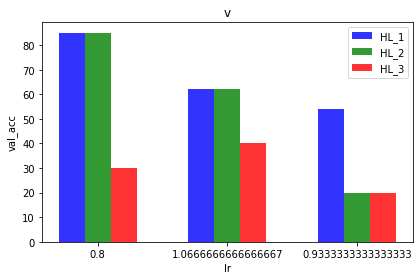

In [30]:
# data to plot
n_groups = len(set(t['lr']))
hidden_layer_1 = (85, 62, 54)
hidden_layer_2 = (85, 62, 20)
hidden_layer_3 = (30, 40, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, hidden_layer_1, bar_width,
alpha=opacity,
color='b',
label='HL_1')

rects2 = plt.bar(index + bar_width, hidden_layer_2, bar_width,
alpha=opacity,
color='g',
label='HL_2')

rects3 = plt.bar(index + 2*bar_width, hidden_layer_3, bar_width,
alpha=opacity,
color='r',
label='HL_3')

plt.xlabel('lr')
plt.ylabel('val_acc')
plt.title('v')
plt.xticks(index + bar_width, set(t['lr']))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
data.to_csv('HD2_1.csv')